In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
CURRENT_DIR = Path.cwd()
BASE_DIR = CURRENT_DIR.parent

DATA_DIR = BASE_DIR / "data"
RAW_DATA_DIR = DATA_DIR / "raw"

SR_2024_RAW = RAW_DATA_DIR / "311-2024-data.csv"
SR_2025_RAW = RAW_DATA_DIR / "311-2025-data.csv"

In [11]:
# Load the data
SR_2024_raw_df = pd.read_csv(SR_2024_RAW)
SR_2025_raw_df = pd.read_csv(SR_2025_RAW)



## Basic Inspection
* Check for data types, missing values and unique values for categorical columns

In [12]:
# For the time being, let us only consider the SR_2025_raw_df

SR_2025_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924424 entries, 0 to 924423
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SR_NUMBER                 924424 non-null  object 
 1   SR_TYPE                   924424 non-null  object 
 2   SR_SHORT_CODE             924424 non-null  object 
 3   CREATED_DEPARTMENT        508108 non-null  object 
 4   OWNER_DEPARTMENT          924424 non-null  object 
 5   STATUS                    924424 non-null  object 
 6   ORIGIN                    924424 non-null  object 
 7   CREATED_DATE              924424 non-null  object 
 8   LAST_MODIFIED_DATE        924424 non-null  object 
 9   CLOSED_DATE               853836 non-null  object 
 10  STREET_ADDRESS            924083 non-null  object 
 11  CITY                      839919 non-null  object 
 12  STATE                     839919 non-null  object 
 13  ZIP_CODE                  811585 non-null  f

In [15]:
SR_2025_raw_df.head(20)

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR25-01123369,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:59:48 PM,07/01/2025 12:31:56 AM,06/30/2025 11:59:48 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
1,SR25-01123368,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:59:25 PM,07/01/2025 12:31:56 AM,06/30/2025 11:59:25 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
2,SR25-01123367,Aircraft Noise Complaint,AVN,NaN,Aviation,Completed,Internet,06/30/2025 11:58:20 PM,07/01/2025 12:31:56 AM,06/30/2025 11:58:20 PM,10510 W ZEMKE RD,Chicago,Illinois,60666.0,10510,W,ZEMKE,RD,False,False,NaN,NaN,76.0,41.0,NaN,NaN,5.0,16.0,1654.0,27.0,NaN,23,2,6,1.105377e+06,1.941044e+06,41.994900,-87.887750,"(41.994900000941, -87.887749500002)"
3,SR25-01123366,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:57:43 PM,07/01/2025 12:31:56 AM,06/30/2025 11:57:43 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
4,SR25-01123365,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:57:06 PM,07/01/2025 12:31:44 AM,06/30/2025 11:57:06 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
5,SR25-01123364,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:56:37 PM,07/01/2025 12:31:56 AM,06/30/2025 11:56:37 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
6,SR25-01123363,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:56:24 PM,07/01/2025 12:31:56 AM,06/30/2025 11:56:25 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
7,SR25-01123362,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:55:27 PM,07/01/2025 12:31:56 AM,06/30/2025 11:55:27 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094, -87.679845000002)"
8,SR25-01123361,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,06/30/2025 11:54:04 PM,07/01/2025 12:31:56 AM,06/30/2025 11:54:05 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,7.0,K024,2.0,12.0,1225.0,46.0,NaN,23,2,6,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.871

In [16]:
SR_2025_raw_df.describe(include="all")

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
count,924424,924424,924424,508108,924424,924424,924424,924424,924424,853836,924083,839919,839919,811585.000000,924078,924050,924083,915103,924424,924424,0.0,36823,923614.000000,923655.000000,705220.000000,745411,923703.000000,923703.000000,923703.000000,923405.000000,0.0,924424.000000,924424.000000,924424.000000,9.240820e+05,9.240820e+05,924077.000000,924077.000000,924077
unique,924424,103,103,15,14,3,31,858034,369757,760993,242549,3,2,NaN,11745,5,1837,25,2,1,NaN,22302,NaN,NaN,NaN,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290578
top,SR25-01123369,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,02/20/2025 10:24:58 PM,05/11/2025 12:02:10 AM,03/13/2025 06:39:14 PM,2111 W Lexington ST,Chicago,Illinois,NaN,2111,W,Lexington,ST,False,False,NaN,SR25-00212845,NaN,NaN,NaN,K024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(41.87183400094043, -87.6798450000019)"
freq,1,309112,309112,439553,309112,840282,474391,72,608,100,308942,837091,833782,NaN,309153,625271,308942,434524,887601,924424,NaN,51,NaN,NaN,NaN,295467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159395
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60631.366286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.005010,28.900674,7.178853,NaN,2.557781,13.144605,1343.683391,30.218705,NaN,13.395296,4.003070,3.692653,1.150755e+06,1.902340e+06,41.887889,-87.721930,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.949210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.653902,11.359783,3.277081,NaN,1.325078,4.939941,497.296369,14.217610,NaN,4.985602,1.879687,1.701994,2.501585e+04,3.049994e+04,0.084042,0.091332,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,111.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.096621e+06,1.813881e+06,41.644536,-87.920126,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60612.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,25.000000,5.000000,NaN,2.000000,12.000000,1225.000000,21.000000,NaN,10.000000,2.000000,2.000000,1.139948e+06,1.896561e+06,41.871834,-87.761273,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60620.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,28.000000,7.000000,NaN,2.000000,12.000000,1225.000000,27.000000,NaN,14.000000,4.000000,4.000000,1.162234e+06,1.896561e+06,41.871834,-87.679845,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60652.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,41.000000,8.000000,NaN,3.000000,16.000000,1654.000000,46.000000,NaN,17.000000,6.000000,5.000000,1.162234e+06,1.931657e+06,41.968341,-87.679845,NaN


In [ ]:
# Are there any duplicated rows in both the dataframes?

print('Duplicated rows in SR_2024_RAW_df')
print(SR_2024_raw_df[SR_2024_raw_df.duplicated()])

print('Duplicated rows in SR_2025_RAW_df')
print(SR_2025_raw_df[SR_2025_raw_df.duplicated()])

# There are no duplicated rows

Duplicated rows in SR_2024_RAW_df
Empty DataFrame
Columns: [SR_NUMBER, SR_TYPE, SR_SHORT_CODE, CREATED_DEPARTMENT, OWNER_DEPARTMENT, STATUS, ORIGIN, CREATED_DATE, LAST_MODIFIED_DATE, CLOSED_DATE, STREET_ADDRESS, CITY, STATE, ZIP_CODE, STREET_NUMBER, STREET_DIRECTION, STREET_NAME, STREET_TYPE, DUPLICATE, LEGACY_RECORD, LEGACY_SR_NUMBER, PARENT_SR_NUMBER, COMMUNITY_AREA, WARD, ELECTRICAL_DISTRICT, ELECTRICITY_GRID, POLICE_SECTOR, POLICE_DISTRICT, POLICE_BEAT, PRECINCT, SANITATION_DIVISION_DAYS, CREATED_HOUR, CREATED_DAY_OF_WEEK, CREATED_MONTH, X_COORDINATE, Y_COORDINATE, LATITUDE, LONGITUDE, LOCATION]
Index: []
Duplicated rows in SR_2025_RAW_df
Empty DataFrame
Columns: [SR_NUMBER, SR_TYPE, SR_SHORT_CODE, CREATED_DEPARTMENT, OWNER_DEPARTMENT, STATUS, ORIGIN, CREATED_DATE, LAST_MODIFIED_DATE, CLOSED_DATE, STREET_ADDRESS, CITY, STATE, ZIP_CODE, STREET_NUMBER, STREET_DIRECTION, STREET_NAME, STREET_TYPE, DUPLICATE, LEGACY_RECORD, LEGACY_SR_NUMBER, PARENT_SR_NUMBER, COMMUNITY_AREA, WARD, ELECT

## Column wise analysis

In [20]:
# Are there any duplicates in SR_NUMBER column?
print('Duplicated SR_Number in SR_2024_RAW_df')
print(SR_2024_raw_df['SR_NUMBER'][SR_2024_raw_df['SR_NUMBER'].duplicated()])

print('Duplicated SR_Number in SR_2025_RAW_df')
print(SR_2025_raw_df['SR_NUMBER'][SR_2025_raw_df['SR_NUMBER'].duplicated()])

# So, no duplicates in the primary key

Duplicated SR_Number in SR_2024_RAW_df
Series([], Name: SR_NUMBER, dtype: object)
Duplicated SR_Number in SR_2025_RAW_df
Series([], Name: SR_NUMBER, dtype: object)


In [ ]:
# No of unique occurrences in SR_Type
print('No. of Unique values in SR_Type in 2024 data:')
print(len(SR_2024_raw_df['SR_TYPE'].unique()))

print('No. of Unique values in SR_Type in 2025 data:')
print(len(SR_2025_raw_df['SR_TYPE'].unique()))

# 2024 has 107 types whereas 2025 has 103 types

No. of Unique values in SR_Type in 2024 data:
107
No. of Unique values in SR_Type in 2025 data:
103


In [47]:
# Frequency of each unique value 
print('Frequency of SR_Type in 2024 data:')
sr_2024_type_counts = SR_2024_raw_df['SR_TYPE'].value_counts()
sr_2024_pecentage_counts = SR_2024_raw_df['SR_TYPE'].value_counts(normalize=True) * 100

combined_sr_types_2024 = pd.DataFrame({
    'Count': sr_2024_type_counts,
    'Percentage': sr_2024_pecentage_counts
})

combined_sr_types_2024['Percentage'] = combined_sr_types_2024['Percentage'].map('{:.2f}'.format).astype(float)

combined_sr_types_2024

# Top 15 SR Types cover about 80% of the SR's 

Frequency of SR_Type in 2024 data:


,Count,Percentage
SR_TYPE,,
311 INFORMATION ONLY CALL,685581,35.82
Aircraft Noise Complaint,343797,17.96
Graffiti Removal Request,99366,5.19
Pothole in Street Complaint,51243,2.68
Abandoned Vehicle Complaint,49988,2.61
Garbage Cart Maintenance,49121,2.57
Rodent Baiting/Rat Complaint,45732,2.39
Tree Trim Request (NO LONGER BEING ACCEPTED),42834,2.24
Street Light Out Complaint,39171,2.05


In [49]:
# Frequency of each unique value 
print('Frequency of SR_Type in 2025 data:')
sr_2025_type_counts = SR_2025_raw_df['SR_TYPE'].value_counts()
sr_2025_pecentage_counts = SR_2025_raw_df['SR_TYPE'].value_counts(normalize=True) * 100

combined_sr_types_2025 = pd.DataFrame({
    'Count': sr_2025_type_counts,
    'Percentage': sr_2025_pecentage_counts
})

combined_sr_types_2025['Percentage'] = combined_sr_types_2025['Percentage'].map('{:.2f}'.format).astype(float)

combined_sr_types_2025

# Top 15 SR Types cover about 80% of the SR's 

Frequency of SR_Type in 2025 data:


,Count,Percentage
SR_TYPE,,
311 INFORMATION ONLY CALL,309112,33.44
Aircraft Noise Complaint,177541,19.21
Graffiti Removal Request,47306,5.12
Pothole in Street Complaint,30227,3.27
Abandoned Vehicle Complaint,26597,2.88
Tree Trim Request (NO LONGER BEING ACCEPTED),25189,2.72
Garbage Cart Maintenance,23156,2.50
Rodent Baiting/Rat Complaint,18979,2.05
Street Light Out Complaint,18832,2.04


In [50]:
# Are the top 15 of 2024 the same as that of 2025?

top_15_sr_types_2024 = combined_sr_types_2024.head(15).index.tolist()
top_15_sr_types_2025 = combined_sr_types_2025.head(15).index.tolist()

set_sr_2024 = set(top_15_sr_types_2024)
set_sr_2025 = set(top_15_sr_types_2025)

print('Top 15 of SR Types in 2024:')
print(set_sr_2024)

print('Top 15 of SR Types in 2025:')
print(set_sr_2025)

if set_sr_2024 == set_sr_2025:
    print('Top 15 SR Types in 2024 and in 2025 are same')    
else:
    print('Top 15 SR Types in 2024 and in 2025 are not same')
    
    unique_to_2024_top_15 = list(set_sr_2024 - set_sr_2025)
    unique_to_2025_top_15 = list(set_sr_2025 - set_sr_2024)
    
    if unique_to_2024_top_15:
        print("\nSR Types in 2024's Top 15 but NOT in 2025's Top 15:")
        for sr_type in unique_to_2024_top_15:
            print(f"- {sr_type}")
            
    if unique_to_2025_top_15:
        print("\nSR Types in 2025's Top 15 but NOT in 2024's Top 15:")
        for sr_type in unique_to_2025_top_15:
            print(f"- {sr_type}")
            
# Tree removal inspection is not in 2025 top 15 SR Types
# Finance Parking Code Enforcement Review is not in 2024 top 15 SR Types
# For the project, we shall not consider Finance Parking Code Enforcement, but we will consider Tree Removal inspection

Top 15 of SR Types in 2024:
{'Rodent Baiting/Rat Complaint', '311 INFORMATION ONLY CALL', 'Tree Removal Inspection', 'Aircraft Noise Complaint', 'Street Light Out Complaint', 'Tree Emergency', 'Traffic Signal Out Complaint', 'Building Violation', 'Pothole in Street Complaint', 'Tree Trim Request (NO LONGER BEING ACCEPTED)', 'Garbage Cart Maintenance', 'Abandoned Vehicle Complaint', 'Blue Recycling Cart', 'Graffiti Removal Request', 'Tree Debris Clean-Up Request'}
Top 15 of SR Types in 2025:
{'Rodent Baiting/Rat Complaint', '311 INFORMATION ONLY CALL', 'Aircraft Noise Complaint', 'Street Light Out Complaint', 'Tree Emergency', 'Traffic Signal Out Complaint', 'Building Violation', 'Pothole in Street Complaint', 'Finance Parking Code Enforcement Review', 'Tree Trim Request (NO LONGER BEING ACCEPTED)', 'Garbage Cart Maintenance', 'Abandoned Vehicle Complaint', 'Blue Recycling Cart', 'Graffiti Removal Request', 'Tree Debris Clean-Up Request'}
Top 15 SR Types in 2024 and in 2025 are not same

In [51]:
filtered_columns = combined_sr_types_2024.head(15).index.tolist()

filtered_columns

['311 INFORMATION ONLY CALL',
 'Aircraft Noise Complaint',
 'Graffiti Removal Request',
 'Pothole in Street Complaint',
 'Abandoned Vehicle Complaint',
 'Garbage Cart Maintenance',
 'Rodent Baiting/Rat Complaint',
 'Tree Trim Request (NO LONGER BEING ACCEPTED)',
 'Street Light Out Complaint',
 'Tree Debris Clean-Up Request',
 'Tree Emergency',
 'Traffic Signal Out Complaint',
 'Tree Removal Inspection',
 'Building Violation',
 'Blue Recycling Cart']

In [52]:
df_2024_sr_types_filtered = combined_sr_types_2024.reset_index()
df_2024_sr_types_filtered.columns = ['SR_TYPE', 'Count', 'Percentage']
df_2024_sr_types_filtered = df_2024_sr_types_filtered[df_2024_sr_types_filtered['SR_TYPE'].isin(filtered_columns)]
df_2024_sr_types_filtered['Year'] = 2024

df_2025_sr_types_filtered = combined_sr_types_2025.reset_index()
df_2025_sr_types_filtered.columns = ['SR_TYPE', 'Count', 'Percentage']
df_2025_sr_types_filtered = df_2025_sr_types_filtered[df_2025_sr_types_filtered['SR_TYPE'].isin(filtered_columns)]
df_2025_sr_types_filtered['Year'] = 2025

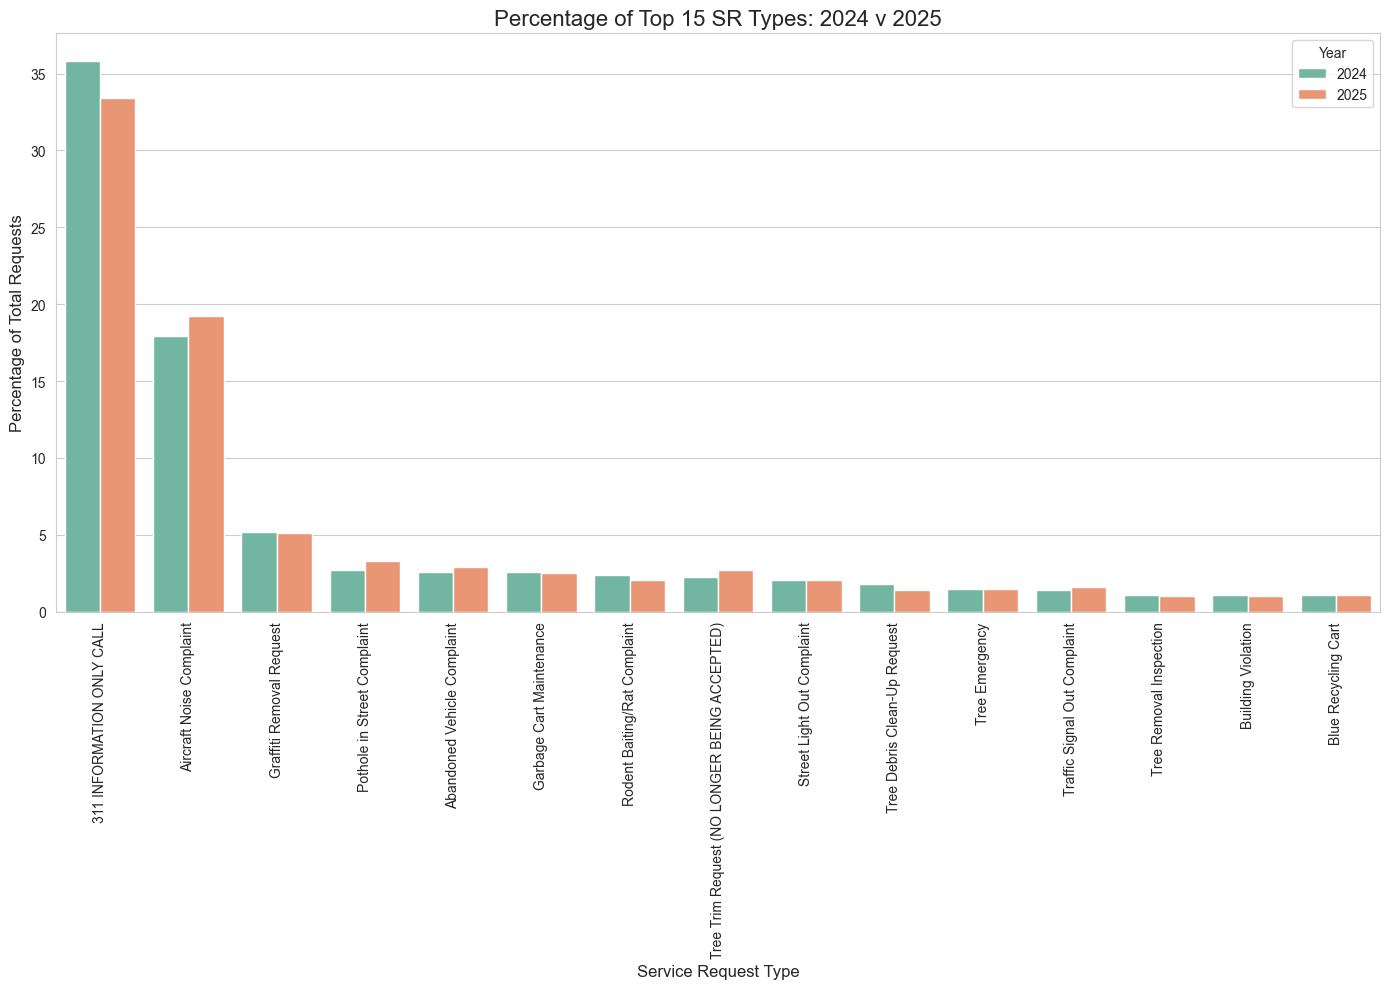

In [ ]:
final_plot_df_percentage = pd.concat([df_2024_sr_types_filtered, df_2025_sr_types_filtered])

# Grouped bar chart for percentages
sns.set_style("whitegrid")

plt.figure(figsize=(14, 10))

sns.barplot(
    data = final_plot_df_percentage,
    x = 'SR_TYPE',
    y = 'Percentage',
    hue = 'Year',
    palette='Set2',
)

plt.title('Percentage of Top 15 SR Types: 2024 v 2025', fontsize = 16)
plt.ylabel('Percentage of Total Requests', fontsize = 12)
plt.xlabel('Service Request Type', fontsize = 12)
plt.legend(title = 'Year', loc = 'upper right')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# Since, the % of SR Types are comparable, we shall proceed with these 15 SR Types for both the years

In [57]:
# Write the filtered columns to a csv
filtered_columns_dict = {'column': filtered_columns}

filtered_columns_df = pd.DataFrame(filtered_columns_dict)

SAVE_DIR = DATA_DIR/'filtered_columns.csv'
filtered_columns_df.to_csv(SAVE_DIR, index=False)

In [64]:
filtered_2024_raw_df = SR_2024_raw_df[SR_2024_raw_df['SR_TYPE'].isin(filtered_columns)]
filtered_2025_raw_df = SR_2025_raw_df[SR_2025_raw_df['SR_TYPE'].isin(filtered_columns)]

In [ ]:
filtered_2024_raw_df['CREATED_DEPARTMENT'].value_counts()

CREATED_DEPARTMENT
311 City Services                                  821968
Alderman                                            40870
CDOT - Department of Transportation                 28617
Streets and Sanitation                              26921
DOB - Buildings                                       500
Fire                                                  225
Health                                                186
Police                                                 47
DWM - Department of Water Management                   23
BACP - Business Affairs and Consumer Protection        23
Outside Agencies                                        6
Animal Care and Control                                 5
DFSS - Department of Family & Support Services          1
Name: count, dtype: int64

In [67]:
filtered_2025_raw_df['CREATED_DEPARTMENT'].value_counts()

CREATED_DEPARTMENT
311 City Services                                  370822
Alderman                                            18401
CDOT - Department of Transportation                 17499
Streets and Sanitation                              10398
DOB - Buildings                                       265
Health                                                 78
Fire                                                   70
Police                                                 26
DWM - Department of Water Management                    8
BACP - Business Affairs and Consumer Protection         7
Outside Agencies                                        4
DFSS - Department of Family & Support Services          1
Name: count, dtype: int64

In [68]:
filtered_2025_raw_df['OWNER_DEPARTMENT'].value_counts()

OWNER_DEPARTMENT
311 City Services                      309112
Streets and Sanitation                 187151
Aviation                               177541
CDOT - Department of Transportation     63870
DOB - Buildings                          9414
Name: count, dtype: int64

In [ ]:
filtered_2024_raw_df['OWNER_DEPARTMENT'].value_counts()

# Since, we do not know how the department impacts the closing time of the request. We shall let it be for the time being

OWNER_DEPARTMENT
311 City Services                      685581
Streets and Sanitation                 390170
Aviation                               343797
CDOT - Department of Transportation    116768
DOB - Buildings                         20600
Name: count, dtype: int64

In [70]:
# Exploring the column status
filtered_2024_raw_df['STATUS'].value_counts()

STATUS
Completed    1538560
Canceled       12892
Open            5464
Name: count, dtype: int64

In [71]:
filtered_2025_raw_df['STATUS'].value_counts()

STATUS
Completed    713376
Open          29845
Canceled       3867
Name: count, dtype: int64

In [ ]:
# Origin column
filtered_2024_raw_df['ORIGIN'].value_counts()

ORIGIN
Phone Call                    871128
Internet                      460531
Mobile Device                  88119
Mass Entry                     76596
Alderman's Office              42601
Salesforce Mobile App           5758
SPOTCSR                         5266
Generated In House              4426
WOFromTerraGo                    787
City Department                  505
spot-open311-Chicago+Works       467
spot-open311-CHITEXT             311
Walk-in                          122
CSCC                             118
Phone                             62
E-Mail                            36
Chicago Police Department         25
Radio                             22
spot-open311-SeeClickFix          12
FY25 Budget Engagement             9
Chicago Fire Department            4
HealthProfessionals                4
Open311 Interface                  2
Spot311 Interface                  2
Social Media                       1
Mayor's Office                     1
Fax                            

In [ ]:
filtered_2025_raw_df['ORIGIN'].value_counts()

# No null values


ORIGIN
Phone Call                    395637
Internet                      237072
Mobile Device                  47520
Mass Entry                     38444
Alderman's Office              18740
Salesforce Mobile App           3512
SPOTCSR                         2843
Generated In House              1860
WOFromTerraGo                    745
City Department                  435
spot-open311-CHITEXT              86
Walk-in                           65
CSCC                              47
spot-open311-Chicago+Works        28
Phone                             15
E-Mail                             9
Chicago Police Department          7
HealthProfessionals                6
Budget Town Hall Meeting           6
FY25 Budget Engagement             3
Chicago Fire Department            2
Radio                              2
TOWPLUS                            1
Mail                               1
PPCA                               1
Mayor's Office                     1
Name: count, dtype: int64

In [ ]:
# Created_Date
print(f'No of null values in Created_Date 2024 Column: {filtered_2024_raw_df["CREATED_DATE"].isnull().sum()}')
print(f'No of null values in Created_Date 2025 Column: {filtered_2025_raw_df["CREATED_DATE"].isnull().sum()}')

# Closed_Date
print(f'No of null values in Closed_Date 2024 Column: {filtered_2024_raw_df["CLOSED_DATE"].isnull().sum()}')
print(f'No of null values in Created_Date 2025 Column: {filtered_2025_raw_df["CLOSED_DATE"].isnull().sum()}')

# Closed Date and Created Date difference matches with the status Open
# Unresolved complaint will have no Closed Date

No of null values in Created_Date 2024 Column: 0
No of null values in Created_Date 2025 Column: 0
No of null values in Closed_Date 2024 Column: 5464
No of null values in Created_Date 2025 Column: 29845


In [80]:
# Creating a directional grouping since Community Area groups are high

directional_groups = {
    'Far North Side': [1, 2, 3, 4, 77, 13, 12, 14, 11, 10, 9, 76],
    'Northwest Side': [17, 18, 19, 20, 15, 16],
    'North Side': [5, 6, 7, 21, 22],
    'West Side': [25, 26, 23, 24, 27, 28, 29, 31, 30],
    'Central': [8, 32, 33],
    'South Side': [34, 60, 35, 37, 38, 36, 39, 40, 41, 42, 43, 69],
    'Southwest Side': [59, 61, 67, 68, 58, 63, 66, 62, 57, 65, 56, 64],
    'Far Southwest Side': [70, 71, 72, 73, 74, 75],
    'Far Southeast Side': [44, 47, 45, 48, 46, 52, 51, 50, 49, 53, 54, 55]
}



SAVE_DIR = DATA_DIR / 'directional_groups.json'

with open(SAVE_DIR, 'w') as f:
    json.dump(directional_groups, f, indent = 4)

